# **Istanbul Stock Exchange**

In [ ]:
#importing the necessory libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [21]:
# Load the dataset
data = pd.read_csv("/content/drive/MyDrive/GirlsScriptOpenSource/ml|RepoProjects/IstanbulStockExchange/istanbul_stock_exchange.csv")


In [22]:
# Display the first few rows of the dataset
data.head()

,date,TL BASED ISE,USD BASED ISE,SP,DAX,FTSE,NIKKEI,BOVESPA,EU,EM
0,5-Jan-09,0.035754,0.038376,-0.004679,0.002193,0.003894,0.000000,0.031190,0.012698,0.028524
1,6-Jan-09,0.025426,0.031813,0.007787,0.008455,0.012866,0.004162,0.018920,0.011341,0.008773
2,7-Jan-09,-0.028862,-0.026353,-0.030469,-0.017833,-0.028735,0.017293,-0.035899,-0.017073,-0.020015
3,8-Jan-09,-0.062208,-0.084716,0.003391,-0.011726,-0.000466,-0.040061,0.028283,-0.005561,-0.019424
4,9-Jan-09,0.009860,0.009658,-0.021533,-0.019873,-0.012710,-0.004474,-0.009764,-0.010989,-0.007802


# Handling Missing Values and Date **Conversion**

In [23]:
# Check for missing values
data.isnull().sum()

# Fill missing values, here we'll use forward fill method for simplicity
data.fillna(method='ffill', inplace=True)

# Convert the 'date' column to datetime type
data['date'] = pd.to_datetime(data['date'])

# Set the 'date' column as the index
data.set_index('date', inplace=True)


<ipython-input-23-17191194f3ec>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['date'] = pd.to_datetime(data['date'])


# Normalize/Standardize the **Data**

In [24]:
# Initialize the scaler
scaler = StandardScaler()

# Normalize/Standardize the data (excluding the date column)
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns, index=data.index)


# Exploratory Data Analysis (EDA)**bold text**

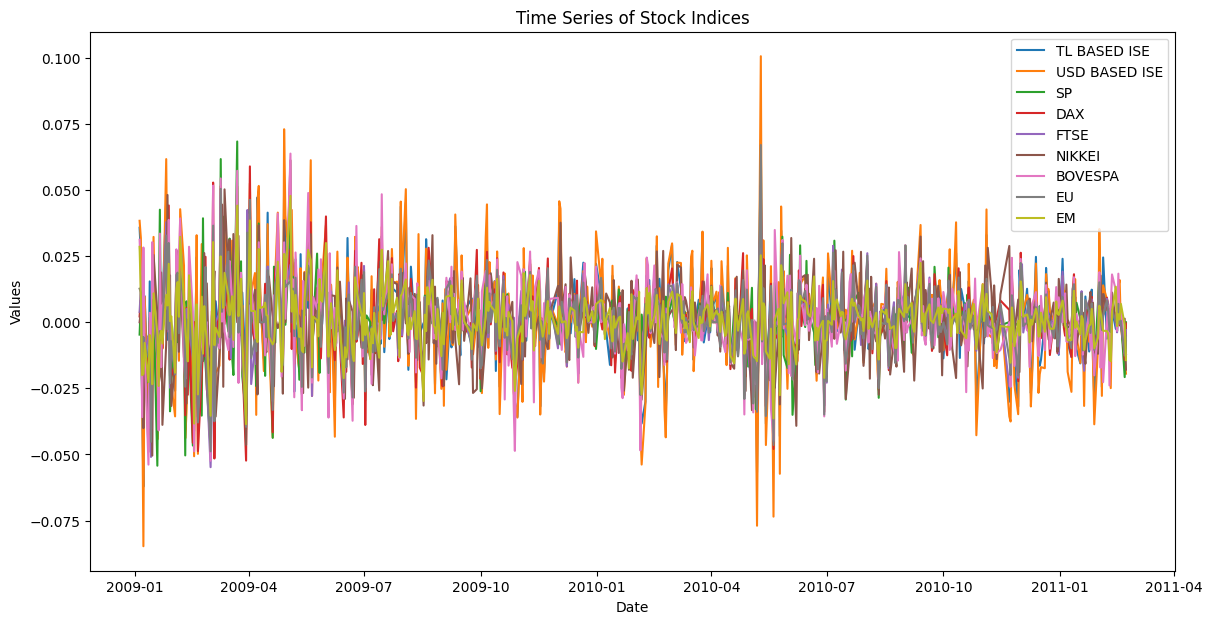

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the time series data
plt.figure(figsize=(14, 7))
for column in data.columns:
    plt.plot(data.index, data[column], label=column)
plt.title('Time Series of Stock Indices')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


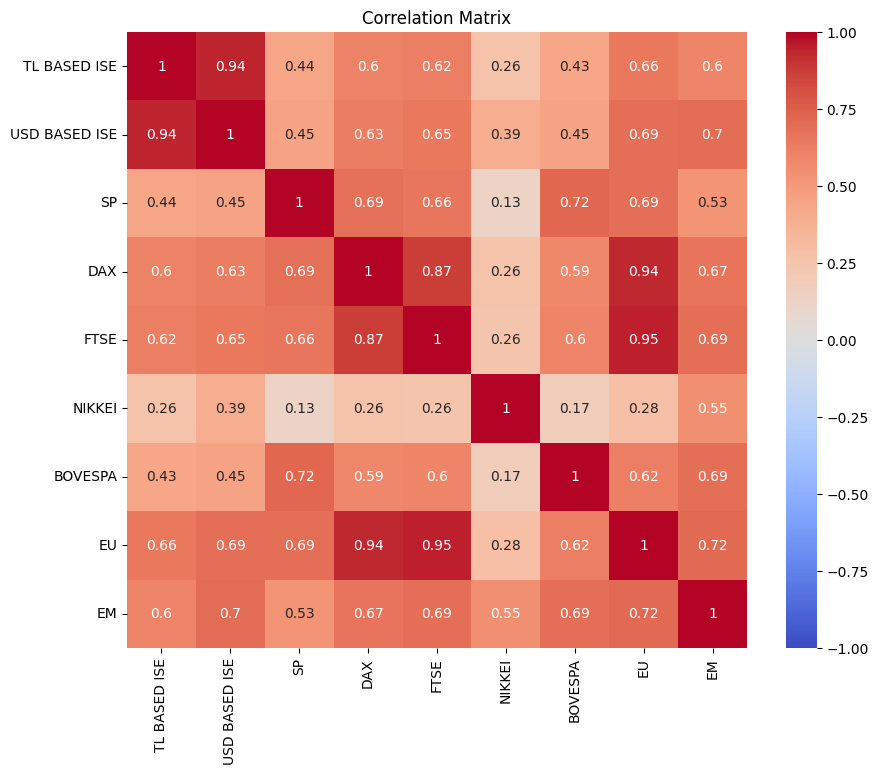

In [26]:

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


# Machine Learning **Models**

In [27]:
# Split the data into features and target variable
X = data_scaled.drop(columns=['TL BASED ISE'])
y = data_scaled['TL BASED ISE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Linear **Regression**

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print(f"Linear Regression MSE: {lr_mse}")
print(f"Linear Regression R2 Score: {lr_r2}")


Linear Regression MSE: 0.11080840031770532
Linear Regression R2 Score: 0.9116229347109879


**Decision Tree**


In [29]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred = dt_model.predict(X_test)

# Evaluate the model
dt_mse = mean_squared_error(y_test, y_pred)
dt_r2 = r2_score(y_test, y_pred)

print(f"Decision Tree MSE: {dt_mse}")
print(f"Decision Tree R2 Score: {dt_r2}")


Decision Tree MSE: 0.2619169682963404
Decision Tree R2 Score: 0.7911038067415616


**Random Forest**

In [30]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {rf_mse}")
print(f"Random Forest R2 Score: {rf_r2}")


Random Forest MSE: 0.15550440816628672
Random Forest R2 Score: 0.8759748972655713
